# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

В этом проекте предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов на основе данных 500 пользователей «Мегалайна». Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

Тариф **«Смарт»**
 - Ежемесячная плата: 550 рублей
 - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета: минута разговора: 3 рубля; сообщение: 3 рубля
 - 1 Гб интернет-трафика: 200 рублей
 
Тариф **«Ультра»**
 - Ежемесячная плата: 1950 рублей
 - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета: минута разговора: 1 рубль; сообщение: 1 рубль
 - 1 Гб интернет-трафика: 150 рублей
 
 **Необходимо посчитать для каждого пользователя:**
 - количество сделанных звонков и израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;
 - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет
 - трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

**Цель исследования** - проверить гипотезы
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Ход исследования**

[1 Изучение данных из файлов](#section1) (Загрузка данных, импорт необходимых библиотек)

 - [1.1 Общая информация и предобработка данных](#section1.1) (Просмотрт общей информации и предобработка данных в соответствующей таблице) 
 
  - [users](#section1.1.1)
  - [tariffs](#section1.1.2)
  - [messages](#section1.1.3)
  - [internet](#section1.1.4)
  - [calls](#section1.1.5)
  
 - [1.2 Рассчеты данных](#section1.2) - Определение для каждого пользователя выручки в месяц
 
[2 Анализ данных](#section2) - ответ на вопрос: "Сколько пользователю требуется минут общения, кол-ва сообщений и интернет трафика в среднем в месяц"

[3 Проверка гипотез](#section3)
 - [средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются](#section3.2)
 - [средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#section3.2)
 
[4 Общий вывод](#section4)

<a id='section1'></a>
## Изучение данных из файлов

In [1]:
# импорт библиотеки
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats as st

In [2]:
# сохраним датасеты в переменные
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

<a id='section1.1'></a>
### Общая информация и предобработка данных

<a id='section1.1.1'></a>
#### Таблица users

In [3]:
# Посмотрим рандомные строки таблицы
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
329,1329,36,NaN,Набережные Челны,Юна,Золотова,2018-10-08,smart
403,1403,18,NaN,Брянск,Ахмет,Амелин,2018-05-20,ultra
158,1158,45,NaN,Новокузнецк,Игорь,Андрейчук,2018-02-03,smart
189,1189,39,NaN,Санкт-Петербург,Аюна,Зубкова,2018-01-30,smart
14,1014,64,NaN,Чебоксары,Яков,Акинфьев,2018-05-15,smart
398,1398,58,NaN,Махачкала,Рауль,Ахмедов,2018-12-06,smart
220,1220,59,NaN,Ростов-на-Дону,Рубен,Астапов,2018-11-22,smart
424,1424,27,NaN,Москва,Розалия,Ёрохова,2018-06-20,ultra
161,1161,65,2018-11-07,Набережные Челны,Татьяна,Голованова,2018-07-03,smart
256,1256,55,NaN,Санкт-Петербург,Алевтина,Панфилова,2018-09-28,smart


Таблица **users** (информация о пользователях):
 - user_id — уникальный идентификатор пользователя
 - first_name — имя пользователя
 - last_name — фамилия пользователя
 - age — возраст пользователя (годы)
 - reg_date — дата подключения тарифа (день, месяц, год)
 - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
 - city — город проживания пользователя
 - tariff — название тарифного плана

Дубликаты

In [4]:
# проверим на явные дубликаты
print(f'Число явных дубликатов: {users.duplicated().sum()}')

Число явных дубликатов: 0


Пропуски

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропуски только в столбце "churrn_date", из условия - это данные прекращения пользования тарифом, можно сделать вывод, что на момент выгрузки данных, тариф был активен, по причине ненадобности этих данных, предположу, что пока можно оставить без изменения.

Изменим тип данных в **red_date**

In [6]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%dT%H:%M:%S')

In [7]:
# переименую столбец tariff в tariff_name, чтобы различать его с таблицей
users.rename(columns = {'tariff' : 'tariff_name'}, inplace = True)

Посмотрим результат

In [8]:
users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
113,1113,52,NaN,Чита,Харитон,Булгаков,2018-01-24,smart
16,1016,58,NaN,Омск,Марица,Сазонова,2018-11-21,ultra
235,1235,26,NaN,Москва,Агафья,Басова,2018-10-06,smart
334,1334,45,NaN,Владивосток,Пётр,Минаев,2018-11-16,smart
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart


<a id='section1.1.2'></a>
#### Таблица tariffs

In [9]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица **tariffs** (информация о тарифах):
 - tariff_name — название тарифа
 - rub_monthly_fee — ежемесячная абонентская плата в рублях
 - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
 - messages_included — количество сообщений в месяц, включённых в абонентскую плату
 - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
 - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со  101 минуты будет взиматься плата)
 - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
 - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [10]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица имеет общую информацию по тарифам, оставляем как есть

<a id='section1.1.3'></a>
#### Таблица messages

Посмотрим таблицу и информацию по ней

In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
messages.sample(5)

,id,message_date,user_id
46849,1203_234,2018-11-08,1203
56787,1251_251,2018-08-07,1251
75801,1321_79,2018-12-21,1321
33555,1146_353,2018-09-13,1146
72207,1304_3,2018-12-06,1304


Таблица **messages** (информация о сообщениях):
 - id — уникальный номер сообщения
 - message_date — дата сообщения
 - user_id — идентификатор пользователя, отправившего сообщение

пропусков нет

приведем **message_date** к нужному типу данных

In [13]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%dT%H:%M:%S')

In [14]:
# проверим
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


<a id='section1.1.4'></a>
####  Таблица internet

Посмотрим таблицу и информацию по ней

In [15]:
internet.sample(5)

,id,mb_used,session_date,user_id
51101,1174_309,745.22,2018-07-05,1174
99392,1332_366,475.51,2018-09-16,1332
131378,1436_344,746.90,2018-11-30,1436
63867,1217_435,0.00,2018-04-25,1217
148628,1496_576,124.98,2018-08-10,1496


Таблица **internet** (информация об интернет-сессиях):
 - id — уникальный номер сессии
 - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
 - session_date — дата интернет-сессии
 - user_id — идентификатор пользователя

In [16]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


пропусков нет

приведем **session_date** к нужному типу данных

In [17]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%dT%H:%M:%S')

Посмотрим на распределение использования интернет-трафика

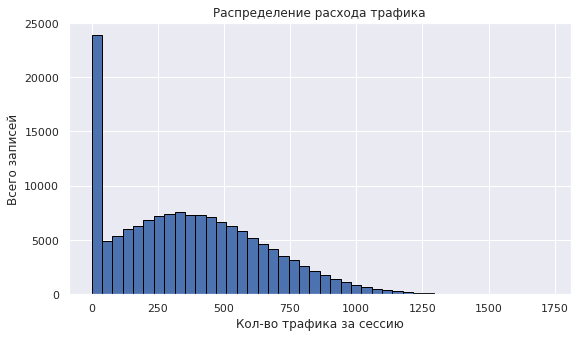

In [18]:
internet['mb_used'].plot(kind='hist', ec='black', bins=44, figsize = (9,5))
plt.title('Распределение расхода трафика')
plt.xlabel('Кол-во трафика за сессию')
plt.ylabel('Всего записей')
plt.show()

Достаточно много занчений около нуля. Так по условию задачи "Мегалайн" - округлять использования трафика и звонков в большую сторону, сделаем это с помощью np.ceil:

In [19]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
# отбросим дробную часть
internet['mb_used'] = internet['mb_used'].astype(int)

Проверим сколько нулевых значений осталось

In [20]:
internet.query('mb_used == 0')

,id,mb_used,session_date,user_id
11,1000_11,0,2018-08-28,1000
38,1000_38,0,2018-11-27,1000
46,1000_46,0,2018-06-30,1000
67,1000_67,0,2018-06-16,1000
72,1000_72,0,2018-06-15,1000
...,...,...,...,...
149380,1499_141,0,2018-12-11,1499
149381,1499_142,0,2018-11-01,1499
149383,1499_144,0,2018-11-27,1499
149386,1499_147,0,2018-10-21,1499


Предположу, что это сессии когда было подключение к интернету, но рафик не расходовался. Эти данные не понадобятся для исследования, но и удалять пока надобности нет, просто оставлю как есть.

<a id='section1.1.5'></a>
#### Таблица calls

По аналогии посмотрим информацию и случайные строки

In [21]:
calls.sample(5)

,id,call_date,duration,user_id
106,1000_106,2018-08-13,7.41,1000
186107,1460_25,2018-07-08,11.02,1460
194968,1477_716,2018-12-03,0.00,1477
129637,1331_533,2018-12-13,3.16,1331
6682,1018_470,2018-12-26,7.28,1018


Таблица **calls** (информация о звонках):
 - id — уникальный номер звонка
 - call_date — дата звонка
 - duration — длительность звонка в минутах
 - user_id — идентификатор пользователя, сделавшего звонок

In [22]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


пропусков нет

приведем **call_date** к нужному типу данных

In [23]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%dT%H:%M:%S')

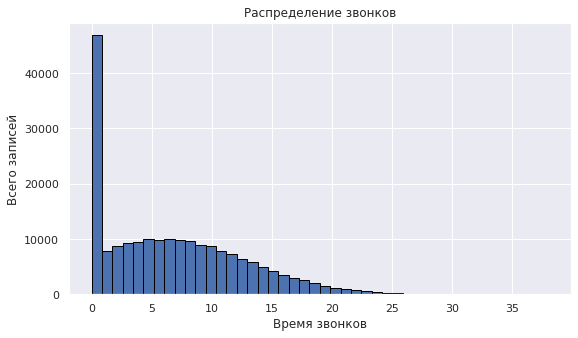

In [24]:
calls['duration'].plot(kind='hist', ec='black', bins=44, figsize = (9,5))
plt.title('Распределение звонков')
plt.xlabel('Время звонков')
plt.ylabel('Всего записей')
plt.show()

Наблюдается схожая проблема как и с трафиком интернета, для начала так же округлим значения до целого, если есть околонулевые звонки

In [25]:
calls['duration'] = calls['duration'].apply(np.ceil)
# так же отбросим друбную часть
calls['duration'] = calls['duration'].astype(int)

Посмотрим на звонки с продолжительность 0 минут

In [26]:
calls.query('duration == 0')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
9,1000_9,2018-08-15,0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0,1499
202592,1499_205,2018-10-13,0,1499
202593,1499_206,2018-12-26,0,1499
202594,1499_207,2018-10-28,0,1499


По условию, данные звонки предполагаю информацию о пропущенных звонках, и удаление не требуется

#### Добавление столбцов "месяц"

Добавим стобы "Месяц" в таблице со звонками, сообщениями и трафиком интернета

In [27]:
calls['month_name'] = calls['call_date'].dt.month_name()
internet['month_name'] = internet['session_date'].dt.month_name()
messages['month_name'] = messages['message_date'].dt.month_name()

Посмотрим на результат

In [28]:
calls.sample(3)

,id,call_date,duration,user_id,month_name
52205,1130_493,2018-04-03,1,1130,April
30150,1076_442,2018-07-28,1,1076,July
10671,1027_541,2018-08-27,9,1027,August


In [29]:
internet.sample(3)

,id,mb_used,session_date,user_id,month_name
28888,1100_254,157,2018-12-29,1100,December
93121,1314_475,795,2018-08-11,1314,August
75417,1253_156,434,2018-10-31,1253,October


In [30]:
messages.sample(3)

,id,message_date,user_id,month_name
53998,1239_63,2018-07-16,1239,July
56558,1251_22,2018-04-02,1251,April
49137,1217_412,2018-03-28,1217,March


<a id='section1.2'></a>
### Рассчёты данных

Из каждого датафрейма возмём необходимую информацию и соеденим в одну таблицу 

In [31]:
# для звонков
total_calls = calls.groupby(['user_id', 'month_name'])['duration'].agg(['count', 'sum'])
# для сообщений
total_messages = messages.groupby(['user_id', 'month_name'])['id'].count()
# для интернет трафика
total_internet = internet.groupby(['user_id', 'month_name']).sum()['mb_used']
# для пользователей, просто удалим не нужные столбцы
total_users = users.drop(columns = ['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis=1)

Объеденим полученные таблицы в одну 

In [32]:
df = pd.concat([total_calls, total_messages, total_internet], axis=1)
df = df.reset_index()
df.head()

,user_id,month_name,count,sum,id,mb_used
0,1000,August,52.0,408.0,81.0,14070.0
1,1000,December,46.0,333.0,70.0,9827.0
2,1000,July,47.0,340.0,75.0,14016.0
3,1000,June,43.0,172.0,60.0,23257.0
4,1000,May,22.0,159.0,22.0,2256.0


In [33]:
df

,user_id,month_name,count,sum,id,mb_used
0,1000,August,52.0,408.0,81.0,14070.0
1,1000,December,46.0,333.0,70.0,9827.0
2,1000,July,47.0,340.0,75.0,14016.0
3,1000,June,43.0,172.0,60.0,23257.0
4,1000,May,22.0,159.0,22.0,2256.0
...,...,...,...,...,...,...
3209,1498,September,59.0,471.0,44.0,22166.0
3210,1499,December,69.0,492.0,66.0,13077.0
3211,1499,November,74.0,612.0,59.0,17984.0
3212,1499,October,68.0,449.0,48.0,17809.0


In [34]:
# переименуем столбцы
df.rename(columns = {'count' : 'amount_calls', 'sum' : 'duration', 'id' : 'amount_messages', \
                     'mb_used' : 'amount_internet'}, inplace = True)

In [35]:
# проверим результат
df

,user_id,month_name,amount_calls,duration,amount_messages,amount_internet
0,1000,August,52.0,408.0,81.0,14070.0
1,1000,December,46.0,333.0,70.0,9827.0
2,1000,July,47.0,340.0,75.0,14016.0
3,1000,June,43.0,172.0,60.0,23257.0
4,1000,May,22.0,159.0,22.0,2256.0
...,...,...,...,...,...,...
3209,1498,September,59.0,471.0,44.0,22166.0
3210,1499,December,69.0,492.0,66.0,13077.0
3211,1499,November,74.0,612.0,59.0,17984.0
3212,1499,October,68.0,449.0,48.0,17809.0


Добавим тариф для каждого пользователя а так же город

In [36]:
df = pd.merge(df, total_users, how='outer', on='user_id')

In [37]:
df

,user_id,month_name,amount_calls,duration,amount_messages,amount_internet,city,tariff_name
0,1000,August,52.0,408.0,81.0,14070.0,Краснодар,ultra
1,1000,December,46.0,333.0,70.0,9827.0,Краснодар,ultra
2,1000,July,47.0,340.0,75.0,14016.0,Краснодар,ultra
3,1000,June,43.0,172.0,60.0,23257.0,Краснодар,ultra
4,1000,May,22.0,159.0,22.0,2256.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3211,1499,November,74.0,612.0,59.0,17984.0,Пермь,smart
3212,1499,October,68.0,449.0,48.0,17809.0,Пермь,smart
3213,1499,September,9.0,70.0,11.0,1848.0,Пермь,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,Волжский,ultra


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          3216 non-null   int64  
 1   month_name       3214 non-null   object 
 2   amount_calls     3174 non-null   float64
 3   duration         3174 non-null   float64
 4   amount_messages  2717 non-null   float64
 5   amount_internet  3203 non-null   float64
 6   city             3216 non-null   object 
 7   tariff_name      3216 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 226.1+ KB


Выявлены пропуски по каждому из столбцов, Возможно пользователи ни разу не звонили, не отправляли сообщения или не выходили в интернет, посмотрим,  есть ли такие в выборке

In [39]:
df[(df['duration'].isnull()) & (df['amount_messages'].isnull()) &
                 (df['amount_internet'].isnull())]

,user_id,month_name,amount_calls,duration,amount_messages,amount_internet,city,tariff_name
3214,1128,NaN,NaN,NaN,NaN,NaN,Волжский,ultra
3215,1371,NaN,NaN,NaN,NaN,NaN,Омск,smart


По данным из таблицы users - это пользователи, которые отключились от тарифов в течении недели, и данных об использовании им звонков, сообщений или интернета нет, по этому большой ценности для расчетов они не представляют.

In [40]:
df = df.drop(labels = [3214,3215],axis = 0)

Остальные пропуски вероятно связаны с тем, что в какие-то периоды пользователи не использовали одну из услуг связи, по этому заменим пропуски на нули, это и будет означать, что они не пользовались определенными услугами связи в определенный период.

In [41]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          3214 non-null   int64  
 1   month_name       3214 non-null   object 
 2   amount_calls     3214 non-null   float64
 3   duration         3214 non-null   float64
 4   amount_messages  3214 non-null   float64
 5   amount_internet  3214 non-null   float64
 6   city             3214 non-null   object 
 7   tariff_name      3214 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 226.0+ KB


<a id='section1.2.1'></a>
**Посчитаем для каждого пользователя выручку в месяц**

исключим безлимитный лимит из сумарного кол-ва звонков, сообщений и интернет трафика, остаток умножим на значение тарифа, прибавим абонентскую плату

In [42]:
# функция подсчета выручки в месяц каждого пользователя по отдельности
def revenue_function(row):
    amount_messages = row['amount_messages']
    amount_internet = row['amount_internet']
    tariff_name = row['tariff_name']
    duration = row['duration']
    amount_calls = row['amount_calls']
    
    if tariff_name == 'smart':
        limit_duration = duration - tariffs.at[0, 'minutes_included']
        limit_internet = amount_internet - tariffs.at[0, 'mb_per_month_included']
        limit_messages = amount_messages - tariffs.at[0, 'messages_included']
        
        if limit_duration < 0: limit_duration = 0
        if limit_internet < 0: limit_internet = 0
        if limit_messages < 0: limit_messages = 0
        
        return (tariffs.at[0, 'rub_per_message'] * limit_messages + 
                   (tariffs.at[0, 'rub_per_gb'] / 1024) * limit_internet + 
                   tariffs.at[0, 'rub_per_minute'] * limit_duration + 
                   tariffs.at[0, 'rub_monthly_fee']
                  ) 
    else:
        limit_duration = duration - tariffs.at[1, 'minutes_included']
        limit_internet = amount_internet - tariffs.at[1, 'mb_per_month_included']
        limit_messages = amount_messages - tariffs.at[1, 'messages_included']
        
        if limit_duration < 0: limit_duration = 0
        if limit_internet < 0: limit_internet = 0
        if limit_messages < 0: limit_messages = 0
        
        return (tariffs.at[1, 'rub_per_message'] * limit_messages + 
                   (tariffs.at[1, 'rub_per_gb'] / 1024) * limit_internet + 
                   tariffs.at[1, 'rub_per_minute'] * limit_duration + 
                   tariffs.at[1, 'rub_monthly_fee']
                  )

df['revenues'] = df.apply(revenue_function, axis=1)
df

,user_id,month_name,amount_calls,duration,amount_messages,amount_internet,city,tariff_name,revenues
0,1000,August,52.0,408.0,81.0,14070.0,Краснодар,ultra,1950.000000
1,1000,December,46.0,333.0,70.0,9827.0,Краснодар,ultra,1950.000000
2,1000,July,47.0,340.0,75.0,14016.0,Краснодар,ultra,1950.000000
3,1000,June,43.0,172.0,60.0,23257.0,Краснодар,ultra,1950.000000
4,1000,May,22.0,159.0,22.0,2256.0,Краснодар,ultra,1950.000000
...,...,...,...,...,...,...,...,...,...
3209,1498,September,59.0,471.0,44.0,22166.0,Владикавказ,smart,1879.296875
3210,1499,December,69.0,492.0,66.0,13077.0,Пермь,smart,598.000000
3211,1499,November,74.0,612.0,59.0,17984.0,Пермь,smart,1425.500000
3212,1499,October,68.0,449.0,48.0,17809.0,Пермь,smart,1028.320312


<a id='section2'></a>
## Анализ данных

Ответим на вопрос: "**Сколько пользователю требуется минут общения, кол-ва сообщений и интернет трафика в среднем в месяц**"

In [43]:
# возмем медианное значение, по причине наличия вбросов в виде использованных минут, сообщений и трафика равных нулю
median_df = df.pivot_table(index='user_id', values=['duration', 'amount_messages', 'amount_internet', 'revenues'], aggfunc='median')
for user_id in users['user_id']:
    median_df.loc[user_id, 'tariff_name'] = users.loc[user_id-1000, 'tariff_name']
# снова появились 2 пользователя, которые отключились в течении месяца, не знаю, в каком моменте их пропустил, по этой причине удалил
median_df = median_df.drop(labels = [1128,1371],axis = 0)
median_df

,amount_internet,amount_messages,duration,revenues,tariff_name
user_id,,,,,
1000,14325.5,65.0,339.0,1950.000000,ultra
1001,16252.5,0.0,422.0,851.953125,smart
1002,17601.0,11.0,214.0,987.695312,smart
1003,11368.0,83.0,824.0,1950.000000,ultra
1004,17828.5,154.5,132.5,1950.000000,ultra
...,...,...,...,...,...
1495,29393.0,82.0,954.0,1950.000000,ultra
1496,24067.5,41.5,524.0,2396.605469,smart
1497,14174.0,17.0,490.0,550.000000,smart


Посчитаем медиану, дисперсию и стандартное отклонение по каждому тарифу.

In [44]:
variance = median_df.pivot_table(index = ['tariff_name'], values = ['duration', 'amount_messages', 'amount_internet'], 
                                  aggfunc=['mean', 'var', 'std'])
variance.rename(columns = {'duration' : 'calls', 'amount_messages' : 'sms', 'amount_internet' : 'internet'}, inplace = True)

In [45]:
variance

mean                                  var               \
                 internet        sms       calls      internet          sms   
tariff_name                                                                   
smart        16853.828571  33.770000  437.468571  1.746858e+07   784.596662   
ultra        20322.489865  56.983108  557.503378  7.923080e+07  2424.263318   

                                   std                         
                    calls     internet        sms       calls  
tariff_name                                                    
smart        25685.390127  4179.542704  28.010653  160.266622  
ultra        92290.576519  8901.168701  49.236809  303.793641

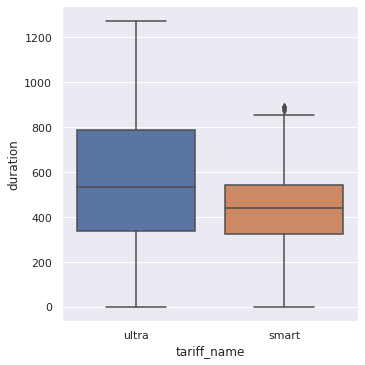

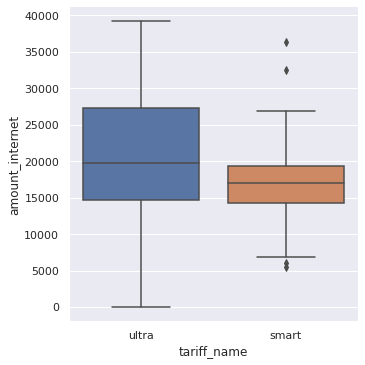

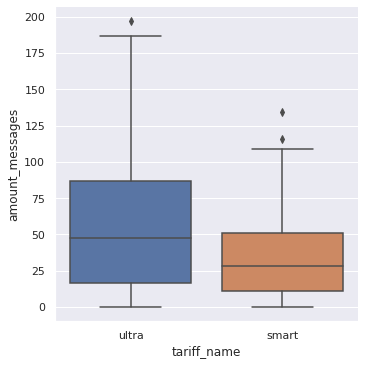

In [46]:
for column in ['duration', 'amount_internet', 'amount_messages']:    
    sns.catplot(x="tariff_name", y=column, kind="box", data=median_df, orient='v')

Большую дисперсию по звонкам, сообщениям и итернет трафику имеет тариф "Ультра", по сравнению с тарифом "Смарт". Медианы также смещены в большую сторону, по вышеперечисленным признакам. Большее кол-во вбросов существенно выше у тарифа "Смарт", что может говорить о том, что пользователям данного тарифа чаще всего не хватает пакета предоставляемых услуг

Посмотрим на среднее распределение звонков, итернет трафика и сообщений по тарифас "Смарт" и "Ультра" по месяцам пользования

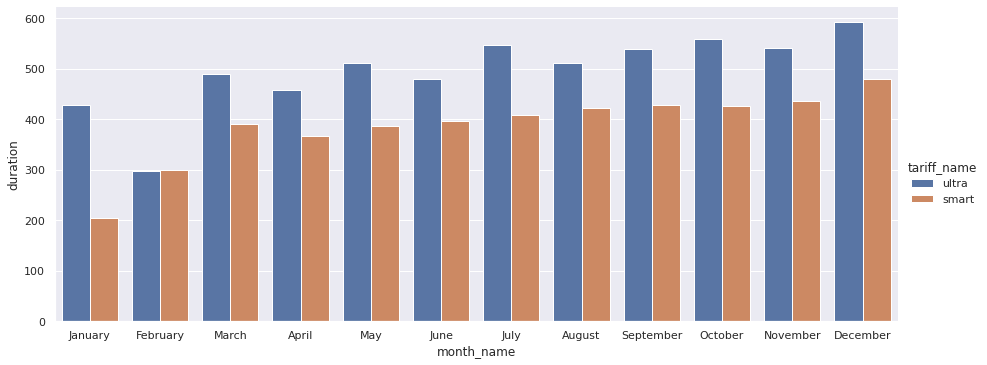

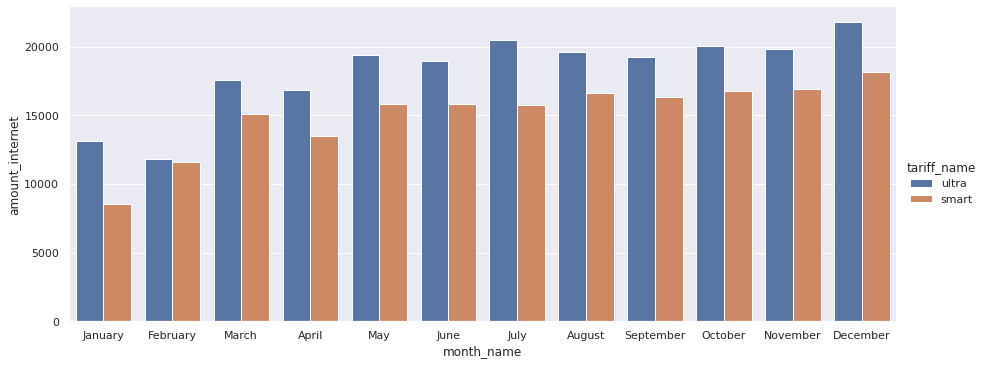

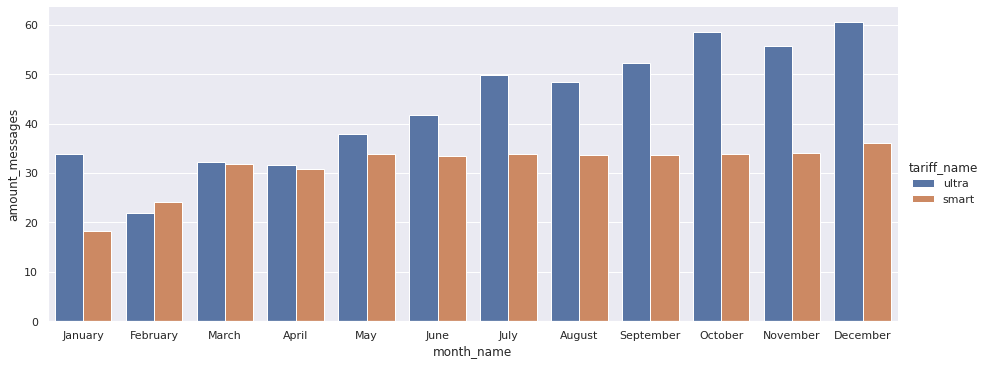

In [47]:
for time in ['duration', 'amount_internet', 'amount_messages']:
    sns.catplot(x="month_name", y=time, hue='tariff_name', kind="bar", data=df, ci=None, 
                order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                       'August', 'September', 'October', 'November', 'December'], aspect=2.5)

Из общего можно выделить тенденцию повышения пользования услугами, с каждым последующим месяцем. Пользователя каждого тарифа не превышают своего лимита, кроме пользователей тарифа "Смарт" улугой "интернет", им чаще не хватает предоставленного им интернет трафика.

Общий **вывод** по каждой из услуг

**Звонки**

В основном, на тарифе "Смарт" люди разговаривают в месяц в течение 300-550 минут. Причем медиана равна 440 минуте, когда лимит общения по тарифу за абонентскую плату - 500 минут, т.е. клиенты регулярно выбирают почти полный лимит голосовой связи.
С тарифом "Ультра" схожая ситуация по кол-ву использованых минут общения, чуть больше 550 в среднем, но по максимум они не используют предоставленные им минуты для общения.
Но по итогу, медиана тарифа "Ультра" больше, чем медиана "Смарт".

**Интернет**

Пользователи с тарифом "Смарт" в среднем в месяц используют от 14500 до 20000 Мб трафика. Причем медиана равна 16,8 Гб, что выходит за пределы, установленные абонентской платой - в 15 Гб. По факту, пользователи тарифа "Смарт" регулярно используют дополнительные пакеты с интернет-трафиком, когда основной заканчивается.
Клиенты с тарифом Ультра активней пользуются интернетом - медиана равна 20 Гб, но учитывая, что лимит в 30 Гб, у них есть ещё большой запас по количеству оставшегося для использования трафика.

**Сообщения**

По обоим тарифам ситуация схожая - большая часть пользователей не отправляет сообщения. Однако, можно увидеть наростающую по кол-ву отправляемых сообщений у клиентов тарифа "Ультра". В обоих тарифах имееются вбросы в виде дополнительном использовании сообщений, могу предположить, что это может быть связано с использованием например смс-рассылок, но в целом по медианным показателям, пользователи "Смарт" и "Ультра" не выходят за рамки предоставленных услуг по отправке сообщений.

<a id='section3'></a>
## Проверка гипотез

<a id='section3.1'></a>
### Гипотеза 1

**Н0 (Нулевая гипотеза)** - средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт".

**Н1 (альтернативная гипотеза)** - средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются.

alpha = 1%

In [48]:
median_df.pivot_table(index='tariff_name', values='revenues', aggfunc='median')

,revenues
tariff_name,
smart,1058.837891
ultra,1950.000000


In [49]:
ultra = median_df.query('tariff_name == "ultra"')['revenues']
smart = median_df.query('tariff_name == "smart"')['revenues']

alpha = .01

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 2.3103649869650044e-58
Отвергаем нулевую гипотезу


**Вывод:**

Исходя из полученного значения P-value, можно сказать следующее, что это слишком низкая вероятность для того, чтобы делать выводы о значимом равенстве между метриками. **Нулевую гипотезу отвергаем**.
Значит, сформулированная **альтернативная гипотеза**, о том, что средняя выручка пользователей тарифов различаются - **не отвергается**.

<a id='section3.2'></a>
### Гипотеза 2

**H0 (Нулевая гипотеза)** - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

**H1 (альтернативная гипотеза)** - средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

alpha = 1%

In [50]:
#создадим две отдельные таблицы, в одной будут все клиенты из Москвы, во второй - остальные регионы
moscow = df[df['city'] == 'Москва']
regions = df[df['city'] != 'Москва']

In [51]:
#проверим соотношения пользователей разных тарифов в наших выборках
moscow.pivot_table(index = 'tariff_name', values = 'revenues', aggfunc = 'count')
regions.pivot_table(index = 'tariff_name', values = 'revenues', aggfunc = 'count')

alpha = 0.01
results = st.ttest_ind(moscow['revenues'], 
                       regions['revenues'], 
                       equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

P-value: 0.4549775646471024
Не удалось отвергнуть нулевую гипотезу


In [52]:
def region_city(city):
    if city == 'Москва': return 'Москва'
    else: return 'Другие регионы'
    
df['region'] = df['city'].apply(region_city)
df.pivot_table(index='region', values='revenues', aggfunc='median')

,revenues
region,
Другие регионы,1518.078125
Москва,1704.632812


**Вывод:**

Из полученного значения P-value следует, что есть большая вероятность того, что отличие средних значений наших выборок случайно. **Нулевая гипотеза не отвергается**, которая говорит о равенстве средних значений. **Альтернативную гипотезу отвергаем**.

<a id='section4'></a>
## Общий вывод

По результатам исследования доходы от тарифа **"Ультра"** больше чем от тарифа **"Смарт"** (1950 и 1159 соответственно).

Основными различиями тарифов можно выделить следующие: 
 - пользователям "Смарт" не хватает предоставляемых им услуг тарифным планом, в большинстве случаев по интернет трафику.
 - пользователи "Ультра" не используют пакет услуг в полном объёме.
 - средние доходы от пользователей Москвы практически не отличаются от доходов других регионов, разница статистически не значимая (P-value: 0.4550) и равна 186 руб.